## Saliency Map Visualization

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

from dataset import *
from model.model import *
from run import make_paths
from utils.utils import *

from visualizations.guided_backprop import *
from visualizations.misc_functions import *

In [2]:
######################################
# Configurable items
######################################
# Key: name, value: # frames
video_examples = { 
    "break/ndUDTMBzJmU_020" : 301,
    "swing/AehnnJzWO80_103" : 251,
    "ballet/mSvNjhEPh7I_050" : 201,
    "flamenco/7L4zXJ1OS6c_456": 301,
    "foxtrot/ezbpkmExW30_035": 301,
    "latin/iRntFnMArIU_206": 301,
    "quickstep/QDiPQ7uBYY4_734": 301,
    "square/RpbBVHlC8SU_056": 241,
    "swing/AehnnJzWO80_103": 251,
    "tango/8LMvAf5ftZ4_008": 301,
    "waltz/AQmHJlhUhes_022": 301, 
}
# How many to skip when iterating through frames of video
skip_size = 50
# Which features to look at
features = [0, 1]


# Load trained models
# some fixed paths
image_dataset = rawImageDataset("/mnt/disks/disk1/processed/test_index.csv")
model, _ = ModelChooser("resnet18_features", 0)
GBP = GuidedBackprop(model)


Gradient for break/ndUDTMBzJmU_020


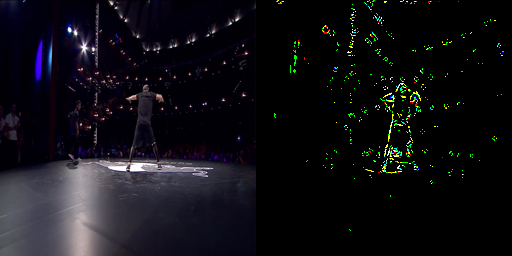

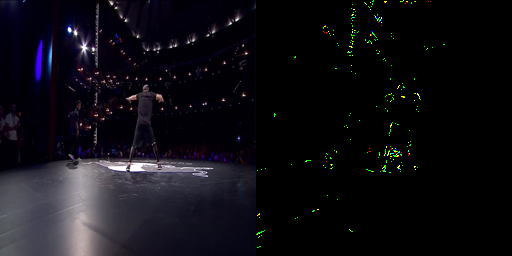

KeyboardInterrupt: 

In [4]:
for video in video_examples:
    print(f"Gradient for {video}")
    max = video_examples[video]
    for i in range(1, max+1, skip_size):
        total_grad = np.zeros((3, 256, 256))
        for f in range(512):
            d, id = os.path.split(video)
            img_path = f"/mnt/disks/disk1/raw/rgb/{video}_{i:04d}.jpg"
            orig_img = Image.open(img_path).resize((256, 256))
            # Grab transformed X
            X = image_dataset.get_X(img_path).unsqueeze(0)
            X.requires_grad_()
            # Get gradients
            guided_grads = GBP.generate_gradients(X, f)
            total_grad += guided_grads/512
            # Save a couple specific neurons gradients
            if f in features:
                d, id = os.path.split(video)
                save_gradient_images(guided_grads, f"{d}_{id}_{i:04d}_f{f}_grad")
                #Visualize
                guided_grads = format_np_output(guided_grads)
                grad_img = Image.fromarray(guided_grads)
                #Make side by side image
                new_img = Image.new('RGB', (512, 256))
                new_img.paste(orig_img, (0, 0))
                new_img.paste(grad_img, (256, 0))
                save_gradient_images(new_img, f"{d}_{id}_{i:04d}_f{f}_full")
                display(new_img)
        #display final total gradient
        img = format_np_output(total_grad)
        img = Image.fromarray(img)
        save_gradient_images(img, f"{d}_{id}_{i:04d}_sum")
        display(img)